In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:

df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv',index_col='Id')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv',index_col='Id')

df = pd.concat([df_train, df_test], axis=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
df.isnull().sum().sort_values()

MSSubClass          0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
                 ... 
SalePrice        1459
Fence            2348
Alley            2721
MiscFeature      2814
PoolQC           2909
Length: 80, dtype: int64

In [5]:
(100*df.isnull().sum()/len(df)).sort_values()

MSSubClass        0.000000
Heating           0.000000
SaleCondition     0.000000
CentralAir        0.000000
1stFlrSF          0.000000
                   ...    
SalePrice        49.982871
Fence            80.438506
Alley            93.216855
MiscFeature      96.402878
PoolQC           99.657417
Length: 80, dtype: float64

In [6]:
(100*df.isnull().sum()/len(df)).sort_values()

MSSubClass        0.000000
Heating           0.000000
SaleCondition     0.000000
CentralAir        0.000000
1stFlrSF          0.000000
                   ...    
SalePrice        49.982871
Fence            80.438506
Alley            93.216855
MiscFeature      96.402878
PoolQC           99.657417
Length: 80, dtype: float64

In [7]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [8]:
percent_nan = percent_missing(df)

<AxesSubplot:>

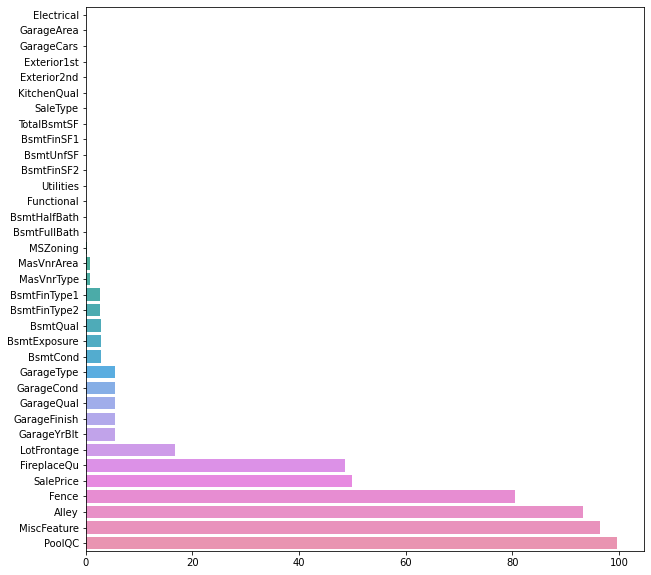

In [9]:
plt.figure(figsize=(10,10))
sns.barplot(y=percent_nan.index,x=percent_nan)

(0.0, 1.0)

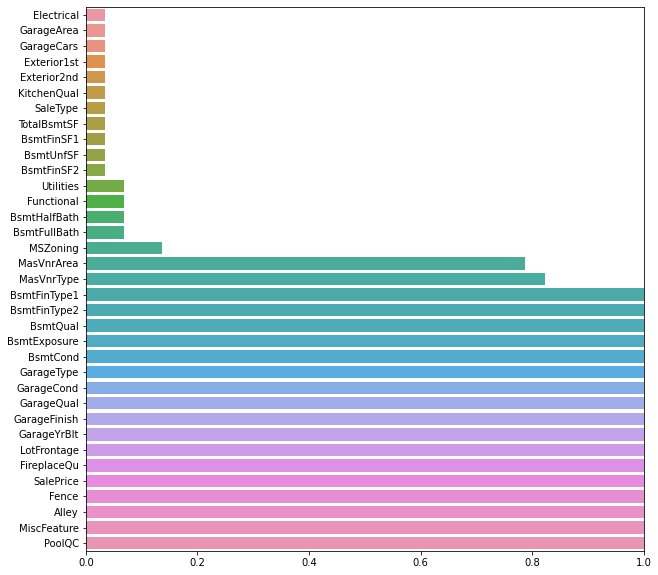

In [10]:
plt.figure(figsize=(10,10))
sns.barplot(x=percent_nan,y=percent_nan.index)
plt.xlim(0,1)

In [11]:
drop_features = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']
df = df.drop(drop_features, axis=1)

In [12]:
percent_nan = percent_missing(df)

(0.0, 1.0)

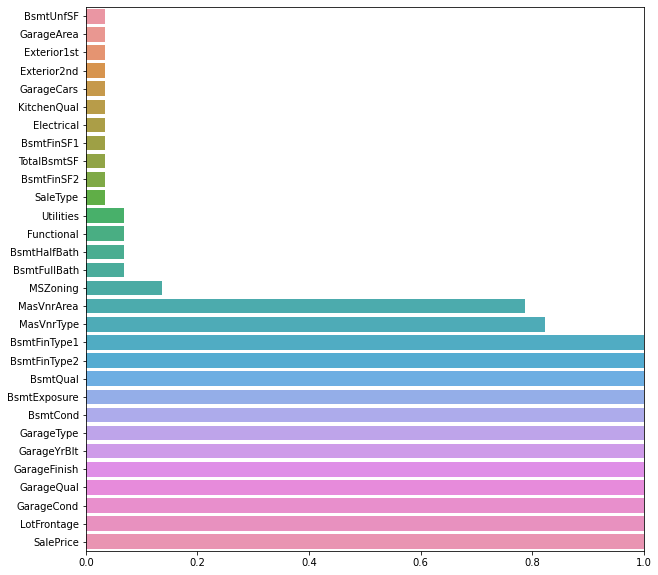

In [13]:
plt.figure(figsize=(10,10))
sns.barplot(x=percent_nan,y=percent_nan.index)
plt.xlim(0,1)

In [14]:
empty_features = []

for col in df.columns:
    if df[col].isnull().nunique() == 2:
        empty_features.append(col)

empty_features = [x for x in empty_features if x not in drop_features]
empty_features.remove('SalePrice')



In [15]:
removed_features = []
for feature in empty_features:
    if df[feature].isnull().sum() <= 5:
        df[feature] = df[feature].fillna(value=df[feature].mode()[0])
        removed_features.append(feature)

empty_features = [x for x in empty_features if x not in removed_features]
df[empty_features].isnull().sum()

LotFrontage     486
MasVnrType       24
MasVnrArea       23
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinType2     80
GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageQual      159
GarageCond      159
dtype: int64

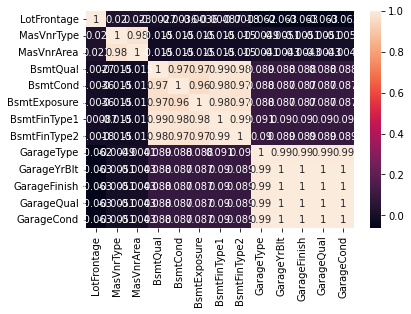

In [16]:
sns.heatmap(df[empty_features].isnull().corr(), annot=True);

In [17]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].mean())

In [18]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(value=0)

In [19]:
to_none = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for feature in to_none:
    df[feature] = df[feature].fillna(value='None')

In [20]:
percent_nan = percent_missing(df)

<AxesSubplot:>

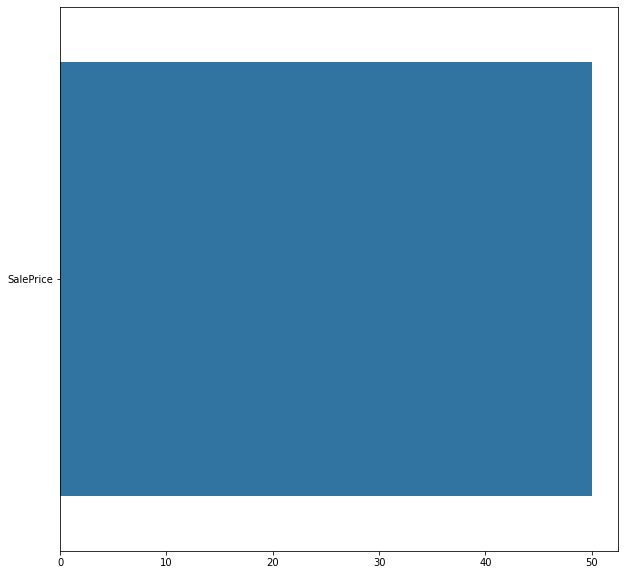

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x=percent_nan,y=percent_nan.index)

In [22]:
#Looks like all null values are now filled in

In [23]:
df['MSSubClass'] = df['MSSubClass'].apply(str)

In [24]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [25]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2919 non-null   float64
 1   LotArea        2919 non-null   int64  
 2   OverallQual    2919 non-null   int64  
 3   OverallCond    2919 non-null   int64  
 4   YearBuilt      2919 non-null   int64  
 5   YearRemodAdd   2919 non-null   int64  
 6   MasVnrArea     2919 non-null   float64
 7   BsmtFinSF1     2919 non-null   float64
 8   BsmtFinSF2     2919 non-null   float64
 9   BsmtUnfSF      2919 non-null   float64
 10  TotalBsmtSF    2919 non-null   float64
 11  1stFlrSF       2919 non-null   int64  
 12  2ndFlrSF       2919 non-null   int64  
 13  LowQualFinSF   2919 non-null   int64  
 14  GrLivArea      2919 non-null   int64  
 15  BsmtFullBath   2919 non-null   float64
 16  BsmtHalfBath   2919 non-null   float64
 17  FullBath       2919 non-null   int64  
 18  HalfBath

In [26]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     2919 non-null   object
 1   MSZoning       2919 non-null   object
 2   Street         2919 non-null   object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   Utilities      2919 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  RoofStyle      2919 non-null   object
 14  RoofMatl       2919 non-null   object
 15  Exterior1st    2919 non-null   object
 16  Exterior2nd    2919 non-null   object
 17  MasVnrType     2919 non-null   object
 18  ExterQual      2919 non-null

In [27]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [28]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Columns: 256 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(12), int64(24), uint8(220)
memory usage: 1.4 MB


In [30]:
df_train =final_df.iloc[:1460] 
df_test = final_df.iloc[1460:]

In [31]:
X_train = df_train.drop('SalePrice',axis =1 )
y_train = df_train['SalePrice']
X_test = df_test.drop('SalePrice',axis = 1)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
scaled_X_train = scaler.fit_transform(X_train)

In [34]:
scaled_X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import ElasticNet
base_elastic_model = ElasticNet(max_iter = 2000)

In [36]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [37]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [38]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=2000),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [39]:
predictions = grid_model.predict(scaled_X_test)

In [40]:
df_for_id = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [41]:
submission = pd.DataFrame({'Id':df_for_id['Id'],'SalePrice':predictions})

In [42]:
submission.to_csv('submission.csv',index = False)